서울 열린데이터광장(https://data.seoul.go.kr/)에서 서울시내 동물병원, 동물약국, 치과의원 리스트를 불러와
연도별 개폐업 현황에 따른 증감 추이를 시각화하고 비교분석합니다.

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
from numpy import nan as NA
from pandas import Series,DataFrame
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
seoul_url_list = [
"http://openapi.seoul.go.kr:8088/Auth_Key/xml/SeoulAnimalHospital/1/1000",
"http://openapi.seoul.go.kr:8088/Auth_Key/xml/SeoulAnimalHospital/1001/2000"
]

param_list = ['SF_TEAM_CODE', 'APV_YMD', 'WRKP_NM', 'TRD_STATE_GBN_CTN', 'DCB_YMD', 'SITE_TEL', 'SITE_AREA']


for i, e in enumerate(param_list) :
    exec( e + ' = []')


for urls in seoul_url_list :
    try : 
        responses = requests.get(urls)
        soup = BeautifulSoup(responses.content, 'lxml-xml')

        for item in soup.findAll('row'):
            for i in param_list :
                eval(i).append(item.find(i).string if item.find(i) else None)
    except :
        print("error in " + urls)


seoul_vet_hospital_list_2018 = pd.DataFrame(dict(zip(param_list, list(map(lambda x : eval(x),param_list)))))


In [9]:
seoul_vet_hospital_list_2018

,SF_TEAM_CODE,APV_YMD,WRKP_NM,TRD_STATE_GBN_CTN,DCB_YMD,SITE_TEL,SITE_AREA
0,3110000,20081126,이강신동물병원,폐업,20150327,307-7502,0.00
1,3210000,19840109,이성환동물병원,폐업,20180810,593-8238,984.36
2,3070000,20000801,서울종합동물병원,정상,None,928-5599,0.00
3,3140000,20140114,리베동물의료센터,폐업,20150130,2604-0156,None
4,3070000,20010507,대학동물병원,정상,None,912-0360,0.00
5,3210000,20020923,My Friends 동물병원,폐업,20030725,532-4777,0.00
6,3070000,20050830,행복한동물병원,정상,None,915-7582,246.24
7,3070000,20060728,미소동물병원,정상,None,929-1212,61.50
8,3190000,19920527,모범동물병원,정상,None,02-532-1740,0.00
9,3110000,19881111,김정복동물병원,정상,None,357-8538,0.00


서울시내 동물병원 리스트를 불러옵니다. Auth_Key 부분은 서울 열린데이터광장에서 개별 신청해야 합니다.

In [3]:
svhl_normal_2018 = seoul_vet_hospital_list_2018.loc[seoul_vet_hospital_list_2018.TRD_STATE_GBN_CTN == '정상']
svhl_abd_2018 = seoul_vet_hospital_list_2018.loc[seoul_vet_hospital_list_2018.TRD_STATE_GBN_CTN == '폐업']
#폐업 동물병원 가운데 폐업일자가 없는 경우는 제외
svhl_abd_2018=svhl_abd_2018.dropna(subset=['DCB_YMD'])
#운영 동물병원의 폐업일자는 최종 업데이트 일자로 처리 (20181112)
svhl_normal_2018['DCB_YMD']='20190314'
svhl_2018 = pd.concat([svhl_normal_2018,svhl_abd_2018])

C:\Users\yes97\AppData\Local\Continuum\anaconda3\envs\yes973\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [4]:
svhl_APY_list_2018 = [datetime.strptime(x,'%Y%m%d') for x in svhl_2018.APV_YMD]
svhl_DCB_list_2018 = [datetime.strptime(x,'%Y%m%d') for x in svhl_2018.DCB_YMD]

In [5]:
res_2018 = pd.Series(dt.date() for group in [pd.date_range(start, end, freq='MS') for start, end in zip(svhl_APY_list_2018, svhl_DCB_list_2018)] for dt in group).value_counts()
res_2018.sort_index(inplace=True)

폐업일자에 따라 데이터를 전처리하고, 지정한 기간동안 매 일자별로 영업중인 동물병원의 개수를 카운팅하여 Series 형태로 만듭니다.

In [11]:
seoul_pharm_url_list = [
"http://openapi.seoul.go.kr:8088/Auth_Key/xml/animalPharmacyInfo/1/1000/"
]

param_list = ['NM', 'ADDR_OLD', 'ADDR', 'PERMISSION_DT', 'TEL', 'AREA','STATE' ,'STOP_DT']



for i, e in enumerate(param_list) :
    exec( e + ' = []')


for urls in seoul_pharm_url_list :
    try : 
        responses = requests.get(urls)
        soup = BeautifulSoup(responses.content, 'lxml-xml')

        for item in soup.findAll('row'):
            for i in param_list :
                eval(i).append(item.find(i).string if item.find(i) else None)
    except :
        print("error in " + urls)


seoul_pharm_list = pd.DataFrame(dict(zip(param_list, list(map(lambda x : eval(x),param_list)))))


In [12]:
seoul_pharm_list.loc[seoul_pharm_list.STATE == '운영중']

,NM,ADDR_OLD,ADDR,PERMISSION_DT,TEL,AREA,STATE,STOP_DT
0,솔동물약국,서울특별시 은평구 진관동 6번지 702동 113호,"서울특별시 은평구 진관4로 77, 702동 113호 (진관동)",20150504,02-355-5304,None,운영중,None
1,봄약국,None,"서울특별시 서초구 헌릉로8길 45, 상가동 2층 203호 (내곡동, 서초포레스타2단지)",20170712,02-575-0112,None,운영중,None
2,우리들약국,서울특별시 서초구 반포동 32-2번지 동화반포프라자빌딩 105호,"서울특별시 서초구 서초중앙로 230 (반포동, 동화반포프라자빌딩)",20151002,02-537-9286,None,운영중,None
3,보룡동물약국,서울특별시 양천구 목동 613-5번지,서울특별시 양천구 목동중앙북로 3 (목동),20130604,2642-8345,None,운영중,None
4,백십자약국,서울특별시 양천구 신월동 575-30번지,서울특별시 양천구 신월로 176 (신월동),20130614,2693-3022,None,운영중,None
5,수정약국,서울특별시 양천구 신정동 1031-1번지,서울특별시 양천구 중앙로 276 (신정동),20130619,2644-3395,None,운영중,None
6,은혜약국,서울특별시 양천구 신정동 908-15번지 1층,"서울특별시 양천구 오목로 193, 1층 (신정동)",20130719,2698-1635,0,운영중,None
7,우주약국,서울특별시 양천구 신정동 314번지 목동8단지상가 113호,"서울특별시 양천구 목동서로 280 (신정동, 목동8단지상가 113호)",20130719,2646-1001,None,운영중,None
8,한솔약국,서울특별시 양천구 신정동 323-16번지 대영프라자 109호,"서울특별시 양천구 목동동로 63 (신정동, 대영프라자 109호)",20130731,2648-0507,None,운영중,None
9,메디팜금성약국,서울특별시 양천구 신월동 183-24번지,서울특별시 양천구 남부순환로40가길 15-1 (신월동),20130816,2605-7281,None,운영중,None


In [13]:
spl_normal_2018 = seoul_pharm_list.loc[seoul_pharm_list.STATE == '운영중']
#spl_abd_2018 = seoul_pharm_list.loc[seoul_pharm_list.STATE == '폐업'] #현재 폐업한 동물약국이 없음
#폐업 동물병원 가운데 폐업일자가 없는 경우는 제외
#spl_abd_2018=spl_abd_2018.dropna(subset=['STATE'])
#운영 동물병원의 폐업일자는 최종 업데이트 일자로 처리 (20181112)
spl_normal_2018['STOP_DT']='20190314'
#spl_2018 = pd.concat([spl_normal_2018,spl_abd_2018])
spl_2018 = spl_normal_2018

In [14]:
spl_PERM_list_2018 = [datetime.strptime(x,'%Y%m%d') for x in spl_2018.PERMISSION_DT]
spl_STOP_list_2018 = [datetime.strptime(x,'%Y%m%d') for x in spl_2018.STOP_DT]

In [15]:
spl_res_2018 = pd.Series(dt.date() for group in [pd.date_range(start, end, freq='MS') for start, end in zip(spl_PERM_list_2018, spl_STOP_list_2018)] for dt in group).value_counts()
spl_res_2018.sort_index(inplace=True)

In [18]:
seoul_dent_url_list = [
"http://openapi.seoul.go.kr:8088/Auth_Key/xml/dentalClinicInfo/1/1000/",
"http://openapi.seoul.go.kr:8088/Auth_Key/xml/dentalClinicInfo/1001/2000/",
"http://openapi.seoul.go.kr:8088/Auth_Key/xml/dentalClinicInfo/2001/3000/",
"http://openapi.seoul.go.kr:8088/Auth_Key/xml/dentalClinicInfo/3001/4000/",
"http://openapi.seoul.go.kr:8088/Auth_Key/xml/dentalClinicInfo/4001/5000/",
]

param_list = ['NM', 'ADDR_OLD', 'ADDR', 'OPEN_DT', 'TEL', 'AREA', 'DETAIL_STAT_NM' ,'STOP_DT']


for i, e in enumerate(param_list) :
    exec( e + ' = []')


for urls in seoul_dent_url_list :
    try : 
        responses = requests.get(urls)
        soup = BeautifulSoup(responses.content, 'lxml-xml')

        for item in soup.findAll('row'):
            for i in param_list :
                eval(i).append(item.find(i).string if item.find(i) else None)
    except :
        print("error in " + urls)


seoul_dent_list = pd.DataFrame(dict(zip(param_list, list(map(lambda x : eval(x),param_list)))))


In [19]:
dent_normal_2018 = seoul_dent_list.loc[seoul_dent_list.DETAIL_STAT_NM == '영업중']
#spl_abd_2018 = seoul_pharm_list.loc[seoul_pharm_list.STATE == '폐업'] #현재 폐업한 치과가 없음
#폐업 동물병원 가운데 폐업일자가 없는 경우는 제외
#spl_abd_2018=spl_abd_2018.dropna(subset=['STATE'])
#운영 동물병원의 폐업일자는 최종 업데이트 일자로 처리 (20181112)
dent_normal_2018['STOP_DT']='20190314'
#spl_2018 = pd.concat([spl_normal_2018,spl_abd_2018])
dent_2018 = dent_normal_2018

In [20]:
dent_PERM_list_2018 = [datetime.strptime(x,'%Y%m%d') for x in dent_2018.OPEN_DT]
dent_STOP_list_2018 = [datetime.strptime(x,'%Y%m%d') for x in dent_2018.STOP_DT]

In [21]:
dent_res_2018 = pd.Series(dt.date() for group in [pd.date_range(start, end, freq='MS') for start, end in zip(dent_PERM_list_2018, dent_STOP_list_2018)] for dt in group).value_counts()
dent_res_2018.sort_index(inplace=True)

In [22]:
dent_resize_2018 = dent_res_2018/5

동물약국과 치과(의원급)도 마찬가지 방법으로 불러와 정리해줍니다.
치과의원의 경우 시각화할 때 그래프 위치를 보정하기 위해 전체 개수를 5로 나누어줍니다.

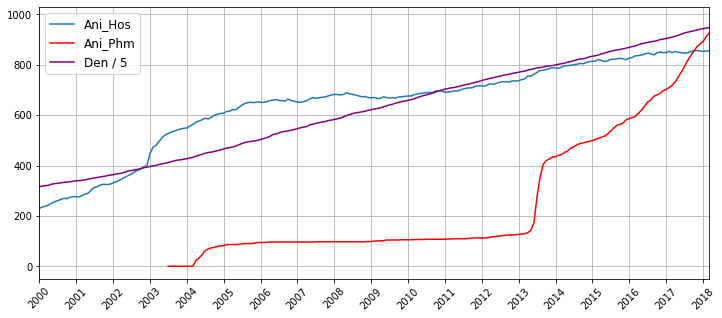

In [25]:
years = mdates.YearLocator() 

plt.rc('figure', figsize=(12,5))
fig, axes = plt.subplots(1,1)

plt.subplots_adjust()
res_2018.plot(ax=axes, grid=True, label='Ani_Hos')
spl_res_2018.plot(ax=axes, color='red', grid=True, label='Ani_Phm')
dent_resize_2018.plot(ax=axes, color='purple', grid=True, label='Den / 5')
axes.set_xlim(datetime.strptime('20000101','%Y%m%d'), datetime.strptime('20180301','%Y%m%d'))
axes.xaxis.set_major_locator(years)
axes.set_xticklabels(range(2000,2020), rotation=45)
axes.legend(fontsize=12)

위와 같이 연도별 동물병원, 동물약국, 치과의원의 개업현황을 시각화할 수 있습니다.